In [84]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)

In [85]:
#bring in titanic data set
url = (
    "http://biostat.mc.vanderbilt.edu/"
    "wiki/pub/Main/DataSets/titanic3.xls"
)
df = pd.read_excel(url)
orig_df = df

In [86]:
# explore Titanic data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [87]:
# how many records and features
df.shape

(1309, 14)

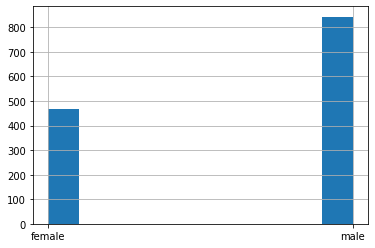

In [128]:
#visually explore gender via histogram
df.sex.hist()

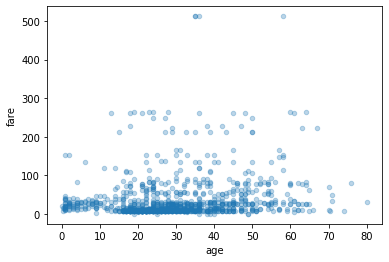

In [140]:
# scatter plot of age vs fare
fig, ax = plt.subplots(figsize=(6, 4))
X.plot.scatter(
    x="age", y="fare", ax=ax, alpha=0.3
)

In [88]:
# value counts of label field
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [89]:
# mean of label values
df.describe().iloc[1:2, 1:2]

,survived
mean,0.381971


In [142]:
# create x and y datasets, with y containing only the label; also drop seemingly irrelevant features in X
y = df.survived
X = df.drop(columns=["survived","body","boat","name", "cabin","ticket"])

In [143]:
# inspect X
X.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,male,48.0000,0,0,26.5500,S,"New York, NY"
6,1,female,63.0000,1,0,77.9583,S,"Hudson, NY"
7,1,male,39.0000,0,0,0.0000,S,"Belfast, NI"
8,1,female,53.0000,2,0,51.4792,S,"Bayside, Queens, NY"
9,1,male,71.0000,0,0,49.5042,C,"Montevideo, Uruguay"


In [144]:
# further inspect X
X.tail(10)

,pclass,sex,age,sibsp,parch,fare,embarked,home.dest
1299,3,male,27.0,1,0,14.4542,C,NaN
1300,3,female,15.0,1,0,14.4542,C,NaN
1301,3,male,45.5,0,0,7.2250,C,NaN
1302,3,male,NaN,0,0,7.2250,C,NaN
1303,3,male,NaN,0,0,14.4583,C,NaN
1304,3,female,14.5,1,0,14.4542,C,NaN
1305,3,female,NaN,1,0,14.4542,C,NaN
1306,3,male,26.5,0,0,7.2250,C,NaN
1307,3,male,27.0,0,0,7.2250,C,NaN
1308,3,male,29.0,0,0,7.8750,S,NaN


In [105]:
# how much missing data is there
X.isnull().sum()

pclass         0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
embarked       2
home.dest    564
dtype: int64

In [126]:
# handle missing numeric
X.interpolate(method ='linear')

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,2665,14.4542,C,NaN
1305,3,female,20.5000,1,0,2665,14.4542,C,NaN
1306,3,male,26.5000,0,0,2656,7.2250,C,NaN
1307,3,male,27.0000,0,0,2670,7.2250,C,NaN


In [122]:
# split the datasets into stratified test train 
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, stratify=y
)

In [123]:
# inspect stratification results A
y_train.describe()


count    916.000000
mean       0.382096
std        0.486165
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [124]:
# inspect strification results B
y_test.describe()

count    393.000000
mean       0.381679
std        0.486418
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64